In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import datetime

In [3]:
# Stats
from scipy import stats

In [4]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# keep plots in jupyter
%matplotlib inline

In [6]:
df = pd.read_csv('/Users/olivierkerdreux/anaconda/projects/total_watt.csv', parse_dates=['Date'])

In [7]:
df.Date.dtype

dtype('<M8[ns]')

In [9]:
df

,Date,Power
0,2011-04-18 13:22:00,925.840614
1,2011-04-18 13:52:00,483.295892
2,2011-04-18 14:22:00,915.761634
3,2011-04-18 14:52:00,609.043491
4,2011-04-18 15:22:00,745.155434
5,2011-04-18 15:52:00,409.855947
6,2011-04-18 16:22:00,434.084038
7,2011-04-18 16:52:00,152.684299
8,2011-04-18 17:22:00,327.579073
9,2011-04-18 17:52:00,156.826946


In [10]:
df['year'] = df.Date.apply(lambda x: x.year)
df['month'] = df.Date.apply(lambda x: x.month)
df['day'] = df.Date.apply(lambda x: x.day)

In [11]:
df

,Date,Power,year,month,day
0,2011-04-18 13:22:00,925.840614,2011,4,18
1,2011-04-18 13:52:00,483.295892,2011,4,18
2,2011-04-18 14:22:00,915.761634,2011,4,18
3,2011-04-18 14:52:00,609.043491,2011,4,18
4,2011-04-18 15:22:00,745.155434,2011,4,18
5,2011-04-18 15:52:00,409.855947,2011,4,18
6,2011-04-18 16:22:00,434.084038,2011,4,18
7,2011-04-18 16:52:00,152.684299,2011,4,18
8,2011-04-18 17:22:00,327.579073,2011,4,18
9,2011-04-18 17:52:00,156.826946,2011,4,18


In [12]:
df2 = df.groupby(['day','month','year']).sum()

In [13]:
df2 = df2.reset_index()

In [14]:
df2

,day,month,year,Power
0,1,5,2011,42598.899117
1,1,7,2016,6.000000
2,2,5,2011,16972.977256
3,3,5,2011,24946.921144
4,6,5,2011,8278.602258
5,7,5,2011,25523.395964
6,8,5,2011,16024.253600
7,9,5,2011,15928.691904
8,10,5,2011,11153.078691
9,11,5,2011,15456.157562


In [15]:
df2['Date'] = pd.to_datetime(df2.year*10000+df2.month*100+df2.day,format='%Y%m%d')

In [16]:
df2

,day,month,year,Power,Date
0,1,5,2011,42598.899117,2011-05-01
1,1,7,2016,6.000000,2016-07-01
2,2,5,2011,16972.977256,2011-05-02
3,3,5,2011,24946.921144,2011-05-03
4,6,5,2011,8278.602258,2011-05-06
5,7,5,2011,25523.395964,2011-05-07
6,8,5,2011,16024.253600,2011-05-08
7,9,5,2011,15928.691904,2011-05-09
8,10,5,2011,11153.078691,2011-05-10
9,11,5,2011,15456.157562,2011-05-11


In [17]:
del df2['year']
del df2['month']
del df2['day']

In [18]:
df2

,Power,Date
0,42598.899117,2011-05-01
1,6.000000,2016-07-01
2,16972.977256,2011-05-02
3,24946.921144,2011-05-03
4,8278.602258,2011-05-06
5,25523.395964,2011-05-07
6,16024.253600,2011-05-08
7,15928.691904,2011-05-09
8,11153.078691,2011-05-10
9,15456.157562,2011-05-11


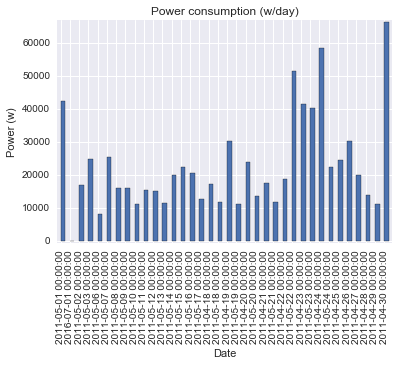

In [19]:
y = df2['Power']
N = len(df2['Power'])
x = range( N )
width = 0.5
plt.bar( x, y, width)
plt.ylabel('Power (w)')
plt.xlabel('Date')
plt.xticks(x, df2['Date'], rotation='vertical')
plt.margins(0.01)
plt.title("Power consumption (w/day)")
plt.show()